Handle imports and paths

In [1]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/') 
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
from nn_optim_unet import *
from postprocessing import *
from dataset_config import datasets
%load_ext autoreload
%autoreload 2

/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/env_gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== Figures ===

CN and AD-CN Test Sets

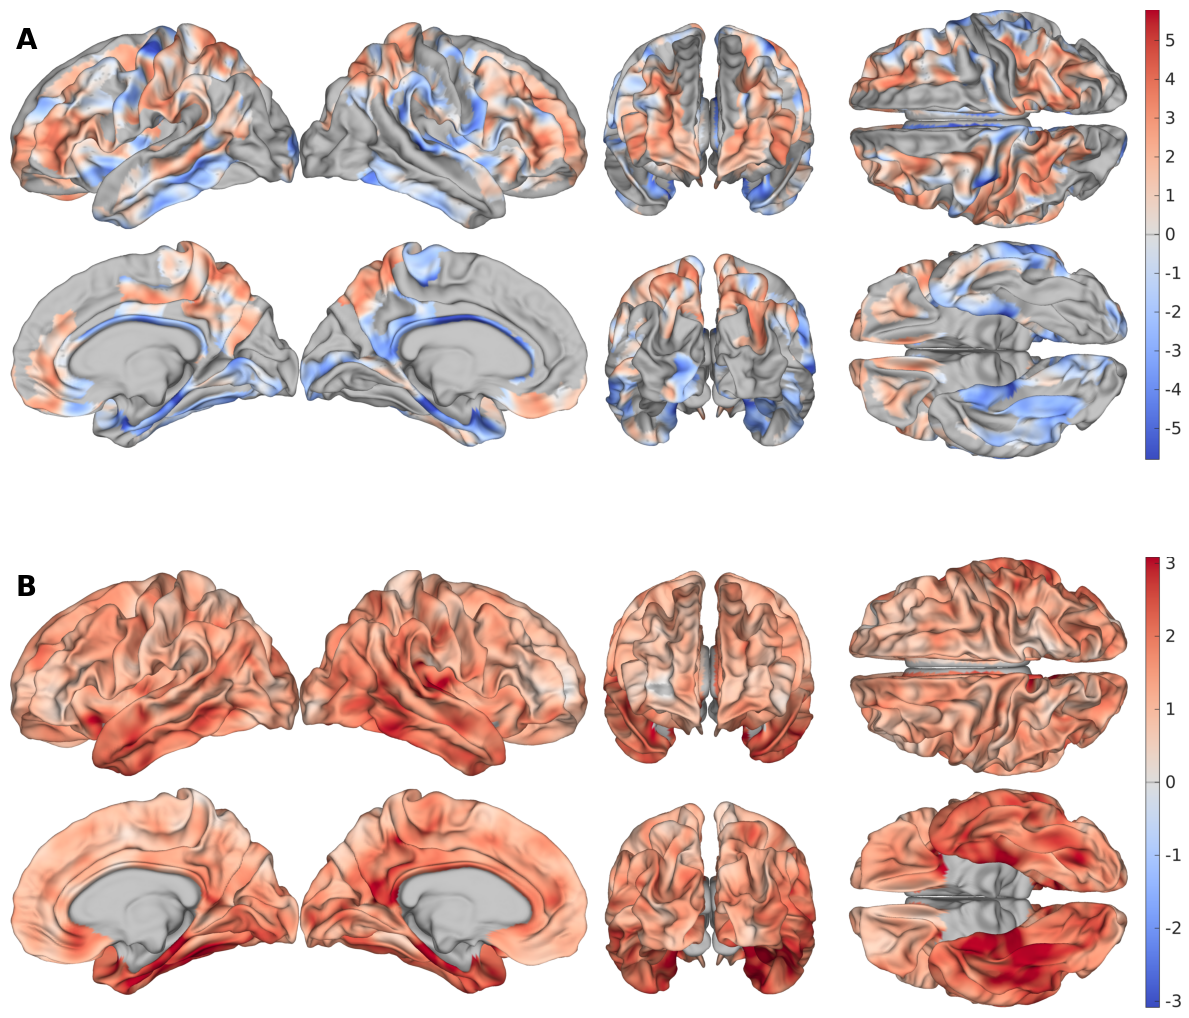

In [25]:
plot_paths = [
    f'{output_dir}test_CN_corrected_ME_data_latL_latR_medR_medL.png',
    f'{output_dir}test_CN_corrected_ME_data_ant_dor_pos_ven.png', 
    f'{output_dir}AD-CN_corrected_ME_data_latL_latR_medR_medL.png',
    f'{output_dir}AD-CN_corrected_ME_data_ant_dor_pos_ven.png'
]

# Labels for the subplots
subplot_labels = ['A', '', 'B', '']

# Plot the generated images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for i, (ax, path) in enumerate(zip(axes, plot_paths)):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks
    ax.text(0.01, 0.99, subplot_labels[i], transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none'))

plt.tight_layout()

Cognitive Test Results, Global and Local

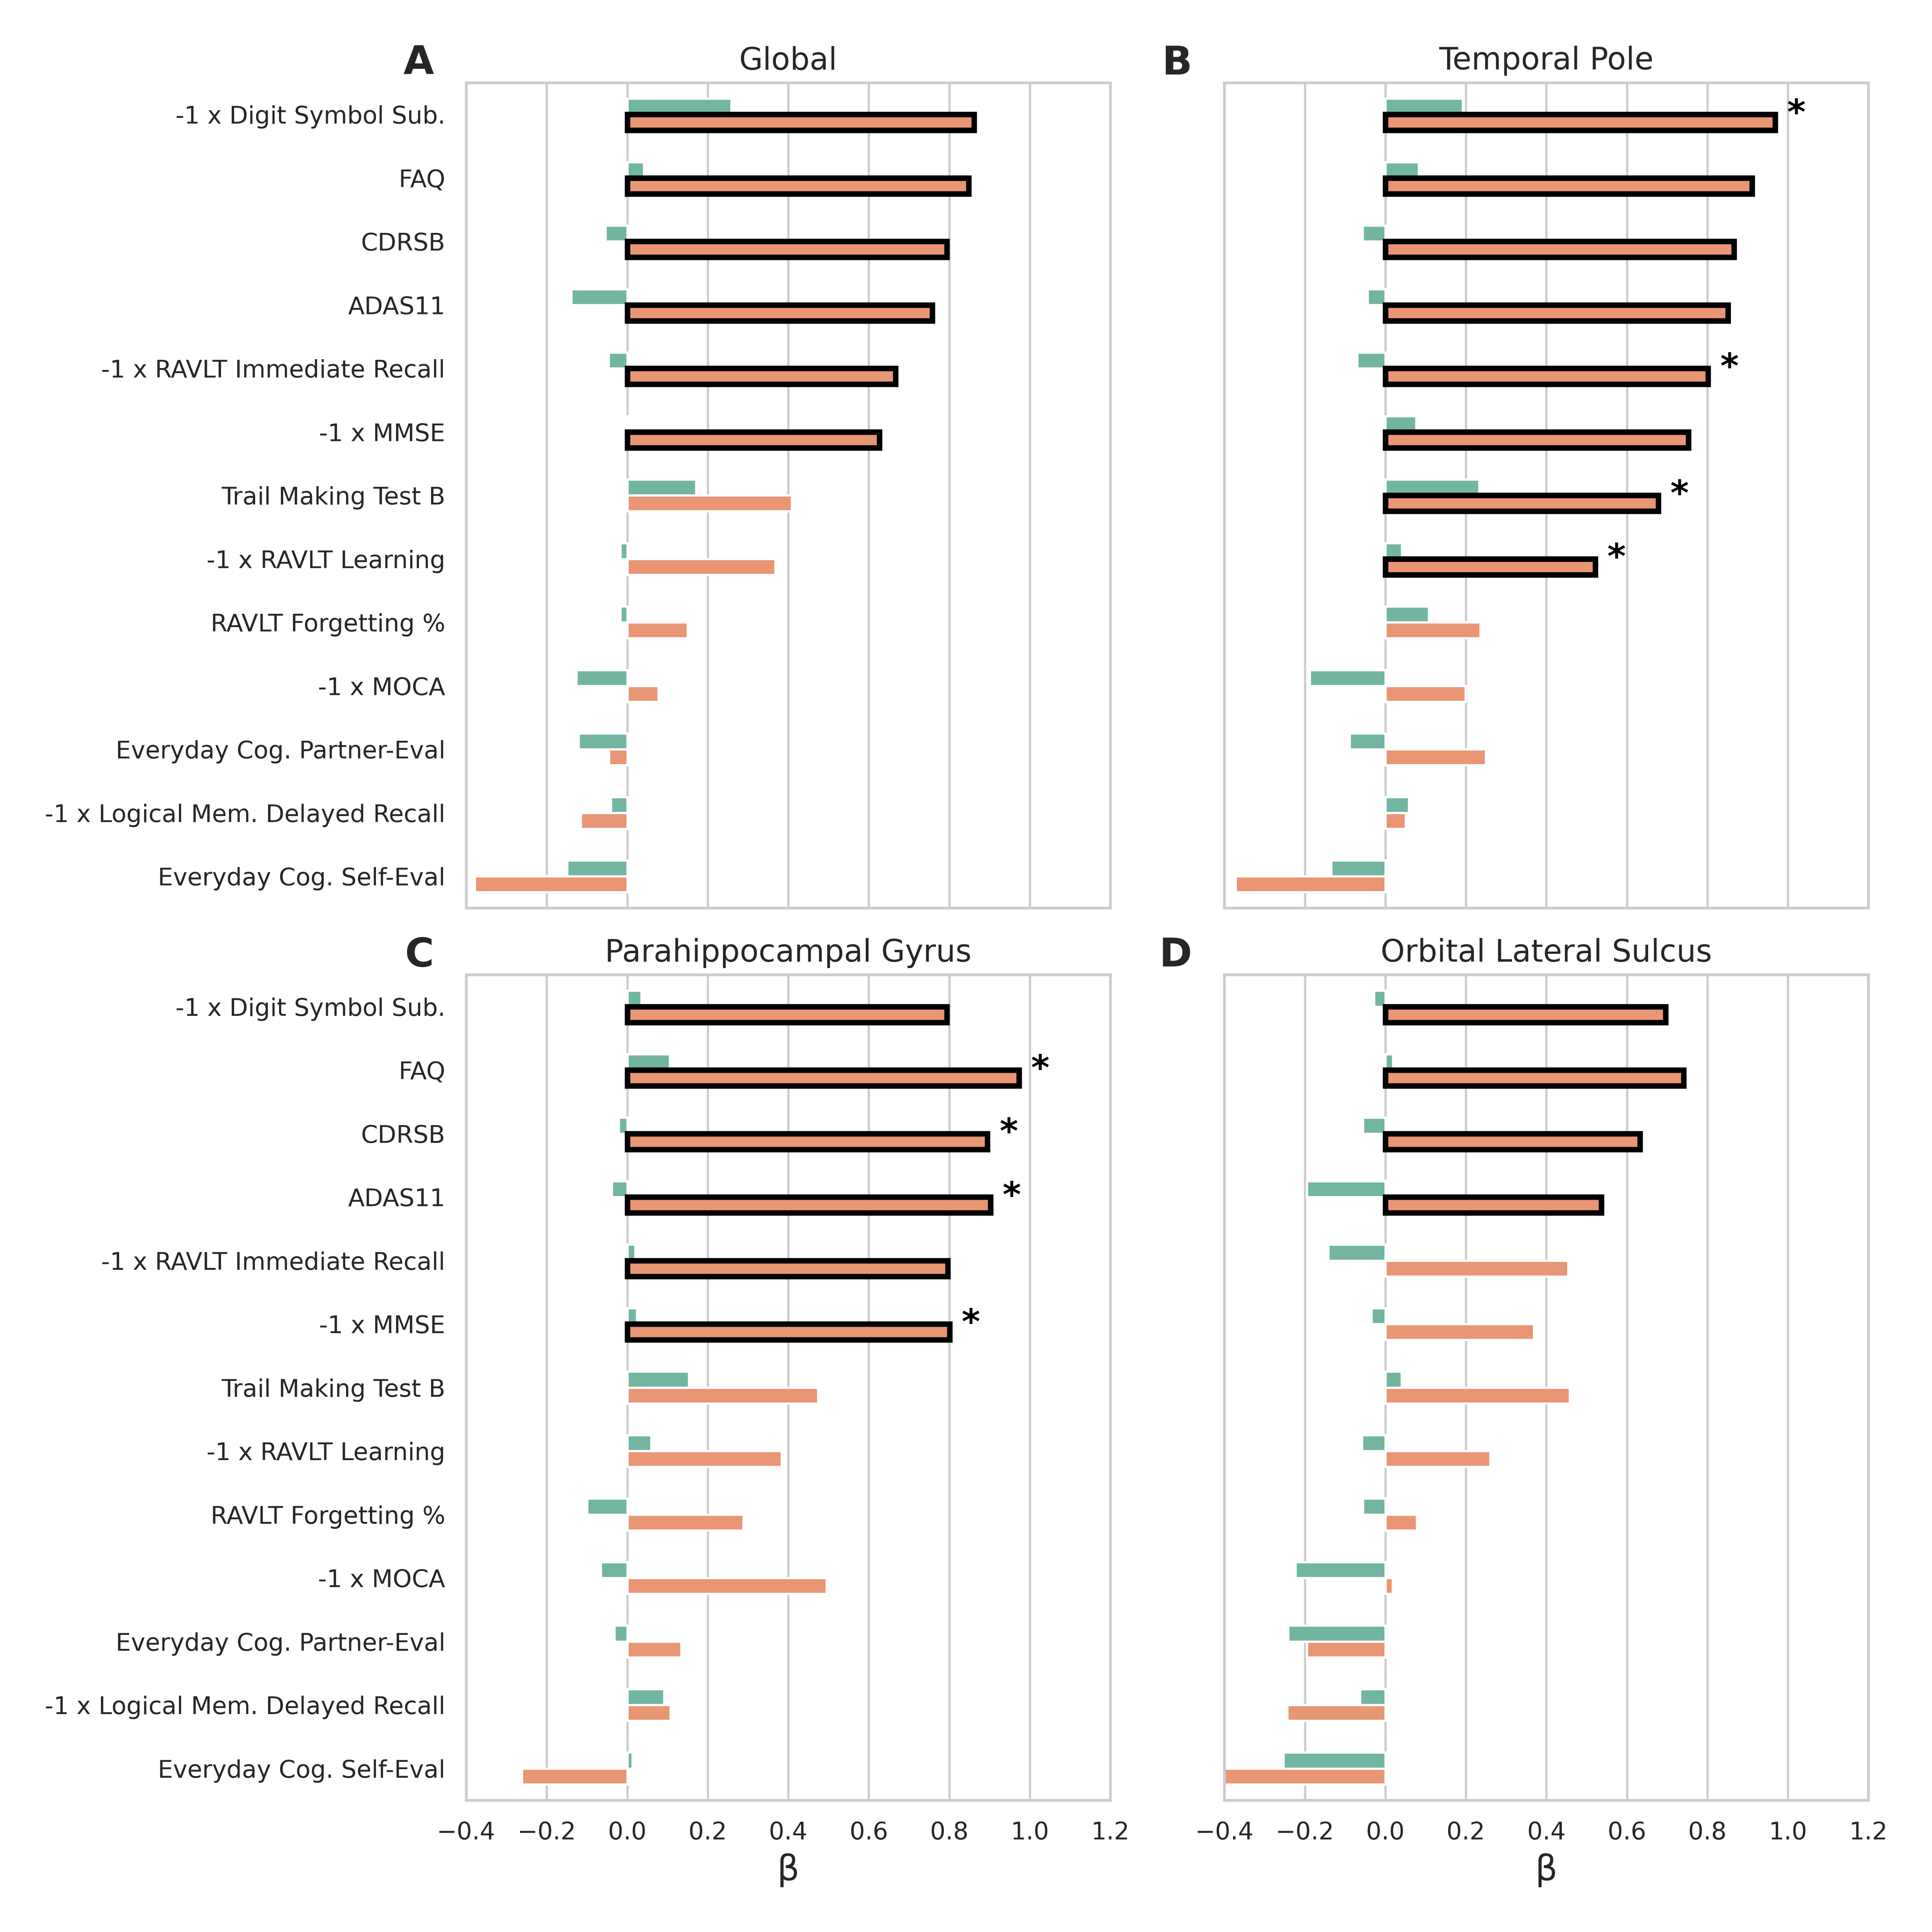

In [2]:
# Path to the global image
img_path = f'{output_dir}local_cog_barplot.png'

# Load and display the image
img = mpimg.imread(img_path)

fig, ax = plt.subplots(figsize=(12, 12), dpi=500)  # Adjust size as needed
ax.imshow(img)
ax.axis('off')
plt.tight_layout()

=== Tables ===

Training Set

In [16]:
older_datasets = [ds for ds in datasets if ds['name'] in ['UKBB', 'NACC', 'IXI', 'ADNI_CN', 'ADNI_AD']]
older_stats = get_dataset_statistics(older_datasets); older_stats.style.hide(axis="index") # training and testing

=== Supplementary Figures ===

G-AGs

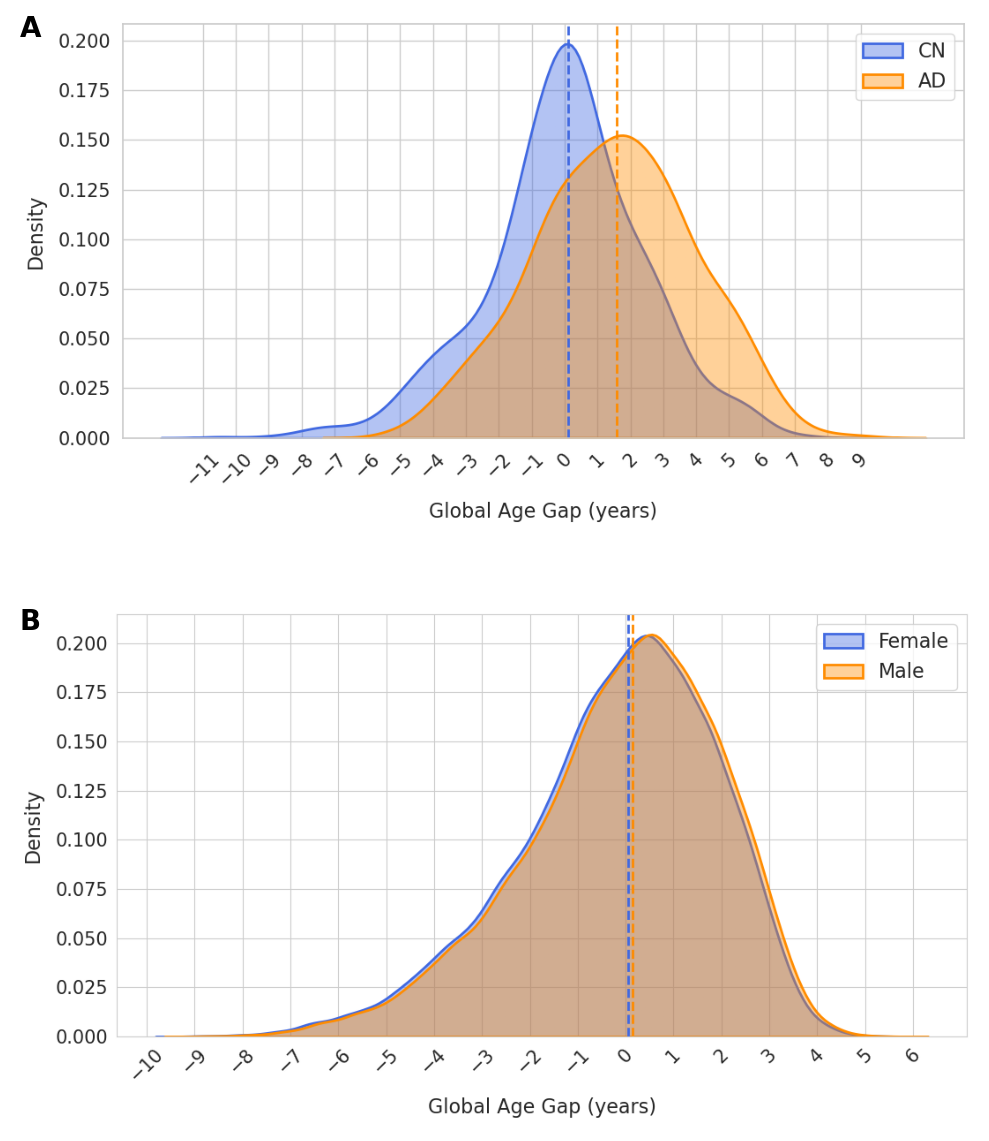

In [27]:
# File paths
plot_paths = [
    f"{output_dir}CN_AD_AGs.png",
    f"{output_dir}f_m_AGs.png"
]

# Labels for the subplots
subplot_labels = ['A', 'B']

# Plot the generated images
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for i, (ax, path) in enumerate(zip(axes, plot_paths)):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks

    ax.text(0.01, 0.99, subplot_labels[i], transform=ax.transAxes,
        fontsize=20, fontweight='bold', va='top', ha='left',
        bbox=dict(facecolor='white', edgecolor='none'))

plt.tight_layout()

Test AD

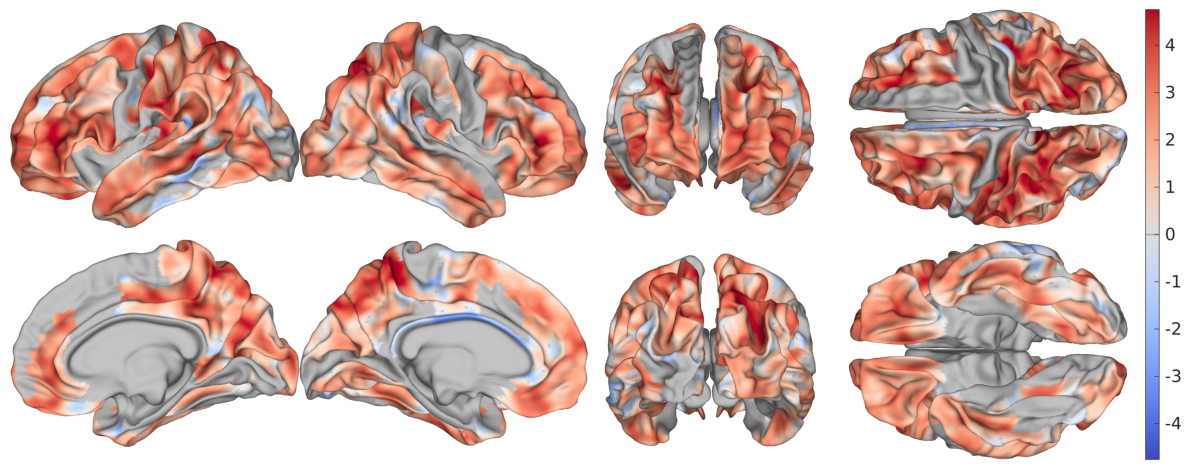

In [8]:
plot_paths = [
    f'{output_dir}test_AD_corrected_ME_data_latL_latR_medR_medL.png',
    f'{output_dir}test_AD_corrected_ME_data_ant_dor_pos_ven.png', 
]

# Plot the generated images
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for i, (ax, path) in enumerate(zip(axes, plot_paths)):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()

=== Supplementary Tables ===

All CN Test Regions

In [19]:
# Get the df and sort it 
df = pd.read_csv(f'{output_dir}test_CN_age_gaps.csv')
df = df.sort_values(by='age_gap', ascending=False)

# Format and display the df
column_order = ['region', 'hemi', 'age_gap', 'region_avg', 'adj_pval']
df = df[column_order]
df['adj_pval'] = df['adj_pval'].apply(lambda x: f"{x:.2e}")
df = df.round(2)
df.to_excel(f'{output_dir}Supplementary_Table_1.xlsx')
print(df.to_string(index=False))

                   region hemi       age_gap  region_avg adj_pval
        S_orbital_lateral   lh  2.89 (-0.69)        2.64 4.66e-21
     Lat_Fis-ant-Vertical   lh  2.43 (-1.15)        1.76 1.15e-14
        S_orbital_lateral   rh  2.39 (-1.19)        2.64 1.63e-15
 G_and_S_transv_frontopol   lh  2.33 (-1.25)        2.12 1.15e-14
           S_front_middle   rh  2.28 (-1.30)        1.74 4.24e-14
           G_parietal_sup   lh  2.24 (-1.34)        2.03 1.79e-13
     G_front_inf-Triangul   lh  2.00 (-1.58)        1.86 1.31e-10
S_intrapariet_and_P_trans   rh  1.93 (-1.65)        1.75 8.64e-10
 G_and_S_transv_frontopol   rh  1.91 (-1.67)        2.12 2.97e-10
    G_front_inf-Opercular   lh  1.88 (-1.70)        0.55 1.71e-09
    S_circular_insula_sup   lh  1.87 (-1.71)        0.76 4.55e-09
 S_oc_sup_and_transversal   rh  1.86 (-1.72)        1.07 3.22e-09
    G_temp_sup-Plan_tempo   lh  1.83 (-1.75)        1.16 3.22e-09
              S_front_sup   rh  1.82 (-1.76)        1.81 4.55e-09
          

All AD-CN regions

In [24]:
# Get the df and sort it 
df = pd.read_csv(f'{output_dir}AD-CN_age_gaps.csv')
df = df.sort_values(by='age_gap', ascending=False)

# Format and display the df
column_order = ['region', 'hemi', 'age_gap', 'region_avg', 'adj_pval']
df = df[column_order]
df['adj_pval'] = df['adj_pval'].apply(lambda x: f"{x:.2e}")
df = df.round(2)
df.to_excel(f'{output_dir}Supplementary_Table_2.xlsx')
print(df.to_string(index=False))

                   region hemi  age_gap  region_avg  adj_pval
    G_oc-temp_med-Parahip   rh     2.79        2.72 8.67e-190
            S_oc-temp_lat   rh     2.73        2.27  7.39e-75
    G_temp_sup-G_T_transv   rh     2.72        2.15  3.55e-84
    G_oc-temp_lat-fusifor   rh     2.69        2.30 2.08e-234
    G_oc-temp_med-Parahip   lh     2.65        2.72  2.61e-92
    S_temporal_transverse   rh     2.52        2.17  7.15e-52
    G_temp_sup-Plan_polar   rh     2.42        2.34  2.97e-58
      S_collat_transv_ant   rh     2.41        2.09 3.13e-120
           G_temporal_inf   rh     2.37        2.21 1.61e-251
            Pole_temporal   lh     2.37        2.28 1.92e-131
     S_collat_transv_post   rh     2.29        2.17  1.14e-72
    G_temp_sup-Plan_polar   lh     2.26        2.34  3.27e-21
    S_circular_insula_inf   rh     2.20        1.90 4.37e-124
             Lat_Fis-post   rh     2.20        1.73  3.60e-67
     G_cingul-Post-dorsal   lh     2.19        1.86  1.56e-88
        

All Cognitive Test Metrics

In [3]:
df = pd.read_csv(f'{output_dir}local_cog_tests.csv')
columns_to_display = ['cohort', 'region', 'hemi', 'test', 'coef', 'r_squared', 'adj_pval']
df = df[columns_to_display]

# Sort within each cohort and region by coef descending
df_sorted = df.groupby(['cohort', 'region'], group_keys=False).apply(
    lambda d: d.sort_values('coef', ascending=False))

# Display without index in Jupyter
df.to_excel(f'{output_dir}Supplementary_Table_2.xlsx')
display(df_sorted.style.hide(axis='index'))

All Female-Male regions

In [4]:
# Get the df and sort it 
df = pd.read_csv(f'{output_dir}f-m_age_gaps.csv')
df = df.sort_values(by='age_gap', ascending=False)

# Format and display the df
column_order = ['region', 'hemi', 'age_gap', 'region_avg', 't_stat', 'raw_pval', 'adj_pval']
df = df[column_order]
df.to_excel(f'{output_dir}Supplementary_Table_3.xlsx')
print(df.to_string(index=False))

                   region hemi   age_gap  region_avg    t_stat  raw_pval  adj_pval
            G_subcallosal   lh -0.039788   -0.064738 -0.159542  0.873506  0.873506
             S_suborbital   lh -0.050325   -0.077784 -0.301119  0.763619  0.768813
     S_interm_prim-Jensen   lh -0.064937   -0.094164 -0.664550  0.506927  0.551656
     G_and_S_frontomargin   lh -0.073051   -0.091862 -1.533305  0.125879  0.317071
     Lat_Fis-ant-Vertical   lh -0.073493   -0.084207 -0.707404  0.480192  0.538397
    G_and_S_occipital_inf   rh -0.074324   -0.086263 -0.845912  0.397984  0.478875
     S_orbital_med-olfact   lh -0.075738   -0.080799 -0.514467  0.607216  0.628447
           G_parietal_sup   lh -0.077887   -0.106602 -1.454040  0.146091  0.352411
       G_occipital_middle   rh -0.079279   -0.093493 -0.941266  0.346787  0.445588
              S_front_inf   lh -0.080431   -0.092804 -0.828796  0.407395  0.482356
   G_and_S_cingul-Mid-Ant   rh -0.081317   -0.086445 -0.930622  0.352255  0.445588
  G_